Задание 1. Загрузка jpg и png. У png убираем прозрачные области 

Введите название файла:  test.jpg


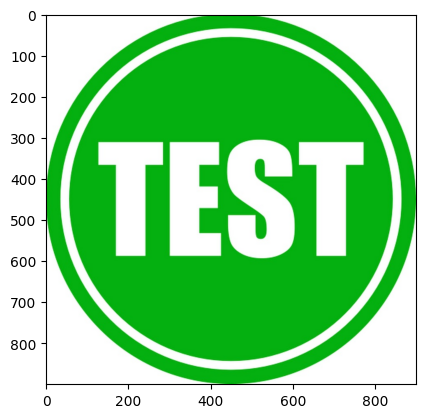

In [51]:
import cv2
import matplotlib.pyplot as plt

imgName = input('Введите название файла: ')
image = cv2.imread(imgName, cv2.IMREAD_UNCHANGED)

convImg = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)
plt.imshow(convImg)

if '.png' in imgName:
    alpha_channel = image[:, :, 3]
    _, mask = cv2.threshold(alpha_channel, 0, 1, cv2.THRESH_BINARY)  # binarize mask
    color = image[:, :, :3]
    newImg = cv2.bitwise_not(cv2.bitwise_not(color, mask=mask))
    
    convNewImg = cv2.cvtColor(newImg, cv2.COLOR_BGRA2RGBA)
    plt.imshow(convNewImg)

    cv2.imwrite('res.png', newImg)

Задание 2. Изменение размера, конвертация в ч/б, размытие по Гауссу

Введите название файла:  test.jpg
Введите целевую ширину:  1000
Введите целевую высоту:  1000
Введите силу размытия:  5


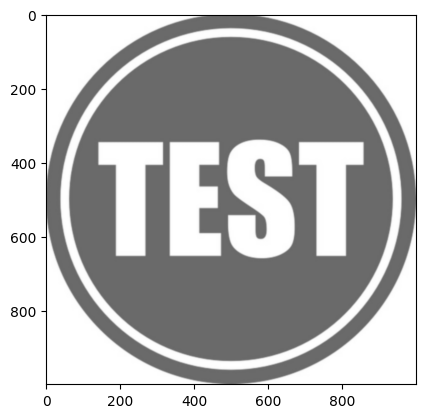

In [67]:
import cv2
import matplotlib.pyplot as plt

imgName = input('Введите название файла: ')
image = cv2.imread(imgName, cv2.IMREAD_UNCHANGED)

resw = int(input('Введите целевую ширину: '))
resh = int(input('Введите целевую высоту: '))
newImg = cv2.resize(image, [resw, resh])

newImg = cv2.cvtColor(newImg, cv2.COLOR_BGRA2GRAY)

blurStr = int(input('Введите силу размытия: '))
if blurStr % 2 == 0:
    blurStr += 1
newImg = cv2.GaussianBlur(newImg, (blurStr, blurStr), 0)

convImg = cv2.cvtColor(newImg, cv2.COLOR_BGRA2RGBA)
plt.imshow(convImg)